In [1]:
%matplotlib inline
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
plt.rcParams['figure.figsize'] = (14, 5)

In [2]:
plt.style.use('seaborn-muted')
plt.rcParams['figure.figsize'] = (14, 5)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = None

[&larr; Back to Index](index.html)

# Energy and RMSE

The **energy** ([Wikipedia](https://en.wikipedia.org/wiki/Energy_(signal_processing%29); FMP, p. 66) of a signal corresponds to the total magntiude of the signal. For audio signals, that roughly corresponds to how loud the signal is. The energy in a signal is defined as

$$ \sum_n \left| x(n) \right|^2 $$

The **root-mean-square energy (RMSE)** in a signal is defined as

$$ \sqrt{ \frac{1}{N} \sum_n \left| x(n) \right|^2 } $$

Let's load a signal:

In [3]:
x, sr = librosa.load('audio/simple_loop.wav')

In [4]:
sr

22050

In [5]:
x.shape

(49613,)

In [6]:
librosa.get_duration(x, sr)

2.2500226757369615

Listen to the signal:

In [7]:
ipd.Audio(x, rate=sr)

Plot the signal:

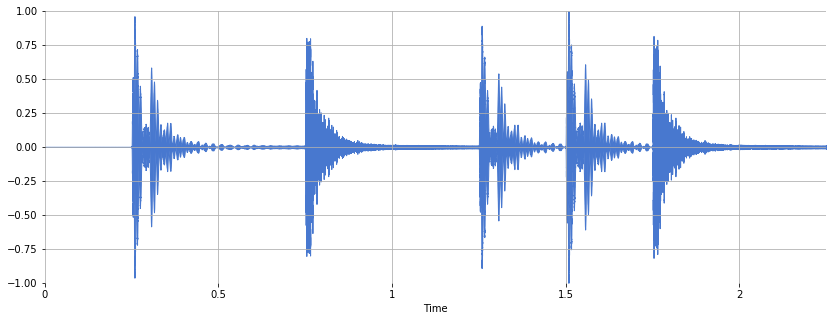

In [8]:
librosa.display.waveplot(x, sr=sr)

Compute the short-time energy using a list comprehension:

In [9]:
hop_length = 256
frame_length = 512

In [10]:
energy = numpy.array([
    sum(abs(x[i:i+frame_length]**2))
    for i in range(0, len(x), hop_length)
])

In [11]:
energy.shape

(194,)

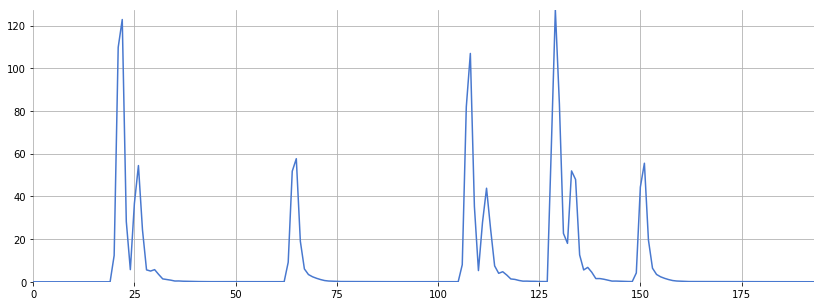

In [12]:
plt.plot(energy)

Compute the RMSE using [`librosa.feature.rmse`](https://librosa.github.io/librosa/generated/librosa.feature.rmse.html):

In [14]:
rmse = librosa.feature.rms(x, frame_length=frame_length, hop_length=hop_length, center=True)

In [15]:
rmse.shape

(1, 194)

In [16]:
rmse = rmse[0]

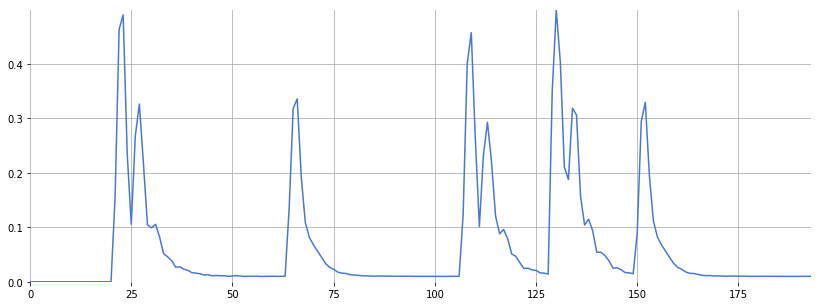

In [17]:
plt.plot(rmse)

Plot both the energy and RMSE along with the waveform:

In [19]:
frames = range(len(energy))
t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)

In [24]:
len(energy), len(frames), len(t)

(194, 194, 194)

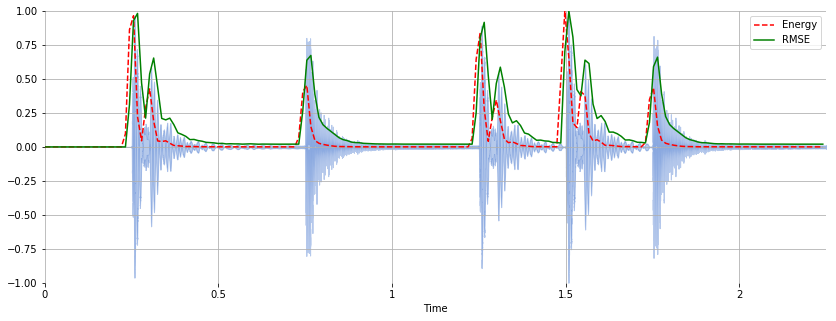

In [26]:
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, energy/energy.max(), 'r--')             # normalized for visualization
plt.plot(t[:len(rmse)], rmse/rmse.max(), color='g') # normalized for visualization
plt.legend(('Energy', 'RMSE'))

## Questions

Write a function, `strip`, that removes leading silence from a signal. Make sure it works for a variety of signals recorded in different environments and with different signal-to-noise ratios (SNR).

In [29]:
def strip(x, frame_length, hop_length):

    # Compute RMSE.
    rmse = librosa.feature.rms(x, frame_length=frame_length, hop_length=hop_length, center=True)
    
    # Identify the first frame index where RMSE exceeds a threshold.
    thresh = 0.01
    frame_index = 0
    while rmse[0][frame_index] < thresh:
        frame_index += 1
        
    # Convert units of frames to samples.
    start_sample_index = librosa.frames_to_samples(frame_index, hop_length=hop_length)
    
    # Return the trimmed signal.
    return x[start_sample_index:]

Let's see if it works.

In [30]:
y = strip(x, frame_length, hop_length)

In [32]:
len(x), len(y)

(49613, 44237)

In [33]:
ipd.Audio(y, rate=sr)

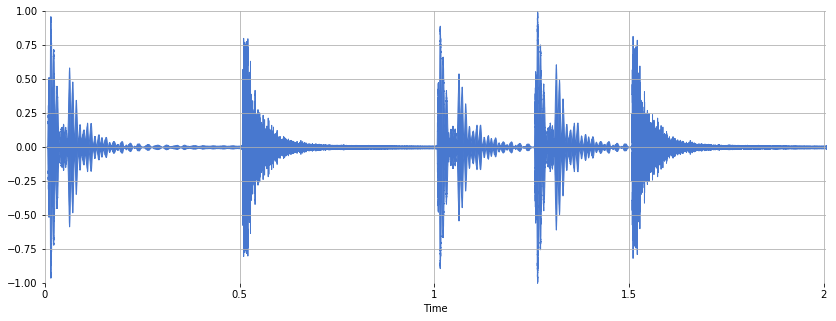

In [34]:
librosa.display.waveplot(y, sr=sr)

It worked!

[&larr; Back to Index](index.html)